

# Time Series Visualizer


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() 

#### Import data (Make sure to parse dates. Consider setting index column to 'date'.)


In [10]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date']).set_index('date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


#### Clean data


In [12]:
df = df[(df['value'] >= (df['value'].quantile(0.025))) &
        (df['value'] <= (df['value'].quantile(0.975)))]
df.index = pd.to_datetime(df.index)

#### Draw line plot
    

Text(0, 0.5, 'Page Views')

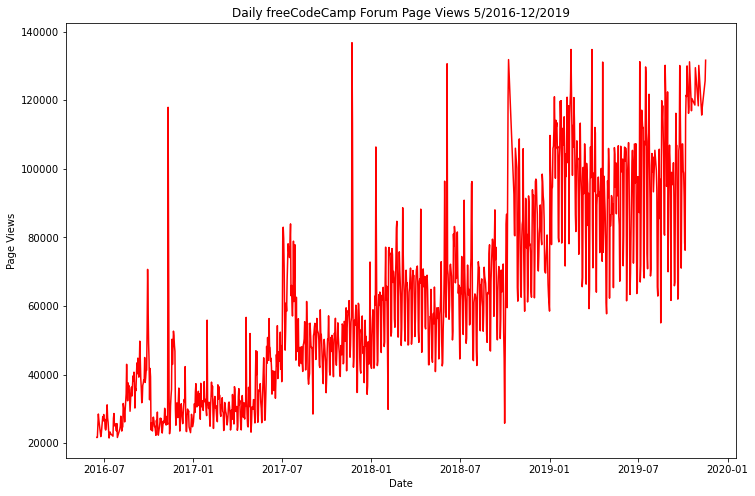

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df.index, df['value'], 'r')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

#### Copy and modify data for monthly bar plot
  

In [18]:
df_bar = df.groupby([(df.index.year), (df.index.month)]).mean()
df_bar.unstack()

value                 ...                             
date             1              2   ...             11            12
date                                ...                             
2016            NaN            NaN  ...   36354.241379  28690.928571
2017   32785.161290   31113.071429  ...   57701.566667  48420.580645
2018   58580.096774   65679.000000  ...   78688.333333  80047.483871
2019  102056.516129  105968.357143  ...  123182.833333           NaN

[4 rows x 12 columns]

#### Draw bar plot


    

Text(0.5, 1.0, 'Average Page views per year')

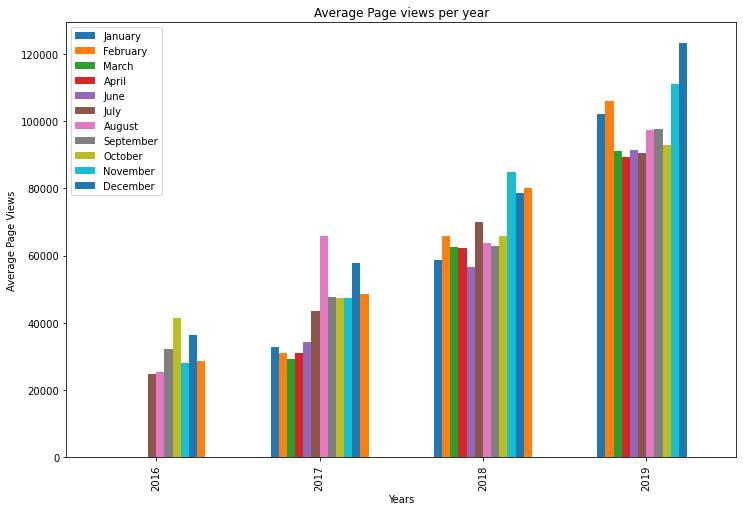

In [44]:
fig = df_bar.unstack().plot(kind='bar', figsize = (12,8), width = 0.6).figure
plt.legend(labels = ('January', 'February', 'March', 'April', "June", "July", "August", "September", "October", "November", "December"))
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.title('Average Page views per year')

#### Prepare data for box plots (this part is done!)

    

In [21]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

#### Draw box plots (using Seaborn)
   

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

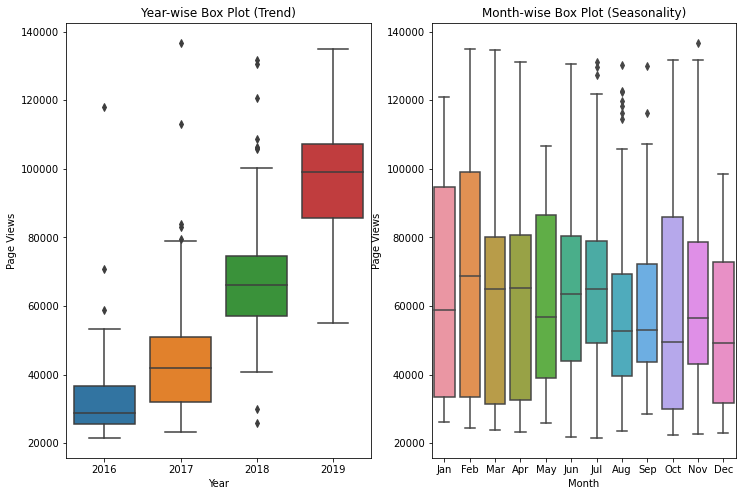

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,8))
ax1 = sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax1.set_title('Year-wise Box Plot (Trend)')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mapping = {month: i for i, month in enumerate(months)}
key = df_box['month'].map(mapping)
key = pd.DataFrame(key)
df_box['key'] = key['month']
a2 = sns.boxplot(x='key', y='value', data=df_box, ax=ax2)
ax2.set_xticklabels(labels=months)
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.title('Month-wise Box Plot (Seasonality)')
